In [3]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils
from pyCascade.probeReadWrite import read_probes_file_switch
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd
import seaborn as sns
from fnmatch import fnmatch
from cycler import cycler
import plotly.express as px
import plotly

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

category =  "config2"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')

Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

In [4]:
run = 41
probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'
oak_probes_dir =  f'{home_dir}/CHARLES/{category}/R{run}/probes/probesOut_parquet/'

In [5]:
# del probes
qoisOutputed = ["comp(u,0)","comp(u,1)","comp(u,2)","p","T"]

# probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "VOLUMETRIC_PROBES", flux_quants = qoisOutputed)
# probes.to_parquet(overwrite = True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "VOLUMETRIC_PROBES", flux_quants = qoisOutputed, file_type = "parquet")


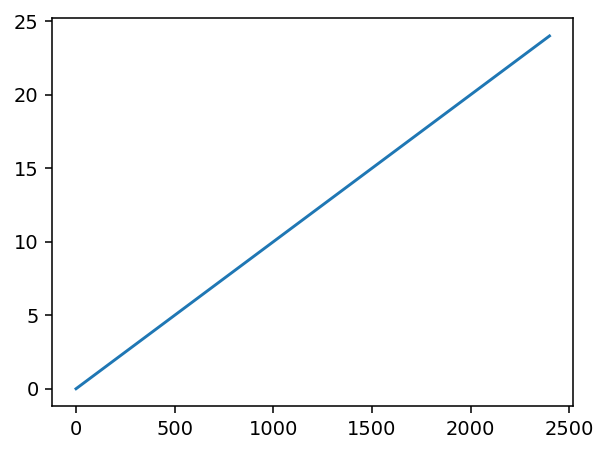

In [6]:
plt.figure()
plt.plot(probes.probe_steps, probes.probe_times)
plt.show()

In [7]:
start = 0# 30000
stop = -1
by = 1

In [9]:
# (fig, ax) = probes.time_plots(
#     steps = probes.probe_steps[start:stop:by],
#     quants = [ "T"],
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     )

In [32]:
@utils.no_kwargs
@utils.dict_apply
def seriesToFloat(s):
    return s.values[0]

## mean statistics
mean = probes.statistics(
    steps = probes.probe_steps[start:stop:by],
    processing = [probePost.time_average, seriesToFloat],
    parrallel=False
    )
    
## rms statistics
rms = probes.statistics( 
    steps = probes.probe_steps[start:stop:by],
    processing = [probePost.time_rms, seriesToFloat],
    parrallel=False
    )

processing data took 57 seconds
processing data took 59 seconds
